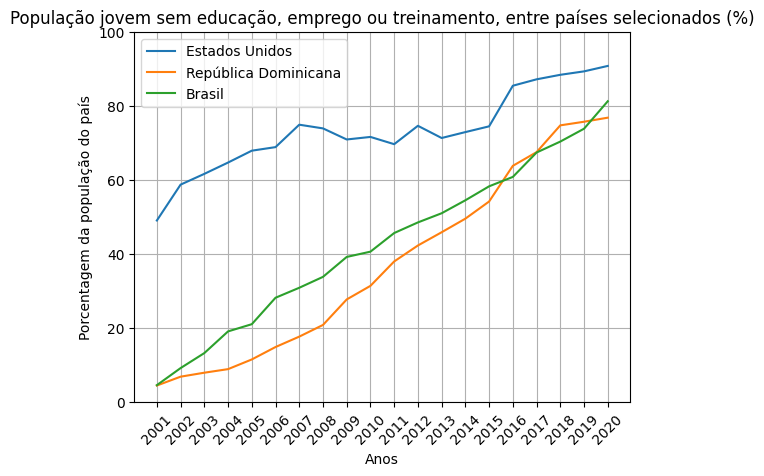

Covariância: 0.0885047896709704
Correlação: 0.9999999999999998


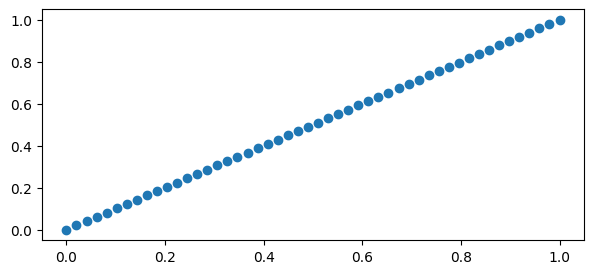

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv('GfSD\SDGData.csv', sep=',',decimal='.', skiprows=0)
df_list = []

# População jovem sem educação, emprego ou treinamento, entre países selecionados (%)
#df_  = df.iloc[[102347]] # Estados Unidos
#df_list.append(df_)
#df_ = df.iloc[[41147]] # República Dominicana
#df_list.append(df_)
#df_ = df.iloc[[28907]] # Brasil
#df_list.append(df_)

# Indivíduos usando a Internet (% da população)
df_  = df.iloc[[102176]] # Estados Unidos
df_list.append(df_)
df_ = df.iloc[[40976]] # República Dominicana
df_list.append(df_)
df_ = df.iloc[[28736]] # Brasil
df_list.append(df_)

plt.style.use('default')

plt.figure()
for df in df_list:
    years = []
    values = []
    for year in range(2001,2021):
        year_ = str(year)
        dado_invalido = pd.isnull(df[year_])
        df.loc[dado_invalido, year_] = 0
        if year == 2010:
            df.loc[dado_invalido, year_] = (df[str(year-1)] + df[str(year+1)])/2
        if year >= 1994:
            years.append(year)
            values.append(df[year_])
    plt.plot(years,values)

plt.xticks(years, rotation=45)
plt.yticks([0, 20, 40, 60, 80, 100])
plt.xlabel('Anos')
plt.ylabel('Porcentagem da população do país')
plt.title('População jovem sem educação, emprego ou treinamento, entre países selecionados (%)')
plt.legend(['Estados Unidos','República Dominicana', 'Brasil', 'Estados Unidos (Internet)', 'República Dominicana (Internet)', 'Brasil (Internet)'])
plt.grid()
plt.show()

#Falta correlação e covariância de cada país, e o texto no Markdown

# toma aqui o codigo de covarianca e correlacao lmao
# import numpy as np
# import matplotlib.pyplot as plt

# a = 1.0
# b = 0.0
# n = 0.0
# x = np.linspace(0,1,50)
# y = a * x + n * np.random.randn(len(x)) + b
# c = np.cov(x, y)[0,1]
# r = np.corrcoef(x, y)[0,1]
# print("Covariância: " + str(c))
# print("Correlação: " + str(r))
# plt.figure( figsize=(7,3) )
# plt.scatter(x, y)
# plt.show()

[TEXTO AQUI]